
# Decision Tree & Ensemble Assignment

Igor Ostaptchenko
 

In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier 
from sklearn.model_selection import train_test_split # Import train_test_split function 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from pytictoc import TicToc
from pprint import pprint
import matplotlib.pyplot as plt
## Importing required libraries
import numpy as np
%matplotlib inline
#%matplotlib notebook
import seaborn as sns
from keras.utils.np_utils import to_categorical

df = pd.read_csv('sonar.csv', header=None)
x_unscaled = df.sample(frac=1, replace=True, random_state=1)
y_hot = to_categorical(x_unscaled[60], num_classes = 2)
y = x_unscaled[60]
x_unscaled.drop([60],axis=1, inplace=True)

Using TensorFlow backend.


## Use the Sonar dataset

x shape:  (208, 60)


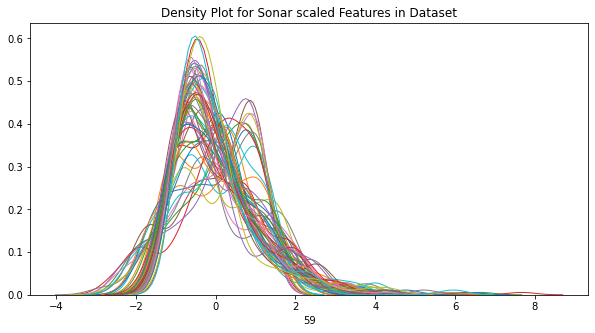

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_unscaled)
x = pd.DataFrame(scaler.transform(x_unscaled), index=x_unscaled.index, columns=x_unscaled.columns)
print("x shape: ",x.shape)
plt.figure(figsize=(10,5))
plt.title('Density Plot for Sonar scaled Features in Dataset')
for i in x.columns:
    # Draw the density plot
    sns.distplot(x[i], hist = False, kde = True,
                 kde_kws = {'linewidth': 1})
    

In [3]:
x[[10,50]].describe()

,10,50
count,2.080000e+02,2.080000e+02
mean,-2.989062e-17,1.024821e-16
std,1.002413e+00,1.002413e+00
min,-1.457818e+00,-1.185540e+00
25%,-8.132420e-01,-6.996136e-01
50%,-1.971152e-02,-2.022988e-01
75%,4.391181e-01,3.405716e-01
max,3.580913e+00,6.323535e+00


## Single Decision Tree (5 Points): Sonar dataset

Classifier with `Unscaled` features

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x_unscaled, y, test_size=0.3, random_state=1) 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Unscaled Features Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Predict the response for test dataset
i=0
for w in clf.feature_importances_:
    if w > 0:
        print("The weight of Featire [" + str(i) + "] is " + str(w))
    i+=1


Unscaled Features Accuracy: 0.873015873015873
The weight of Featire [0] is 0.13167673571154584
The weight of Featire [10] is 0.14267287472747398
The weight of Featire [17] is 0.00885371409783706
The weight of Featire [24] is 0.02896760777104696
The weight of Featire [26] is 0.06250116511314595
The weight of Featire [27] is 0.07898138412464246
The weight of Featire [37] is 0.04449558879938626
The weight of Featire [44] is 0.02507417236169499
The weight of Featire [50] is 0.35532258364468244
The weight of Featire [51] is 0.05366792508697907
The weight of Featire [58] is 0.06778624856156501


Classifier with `Scaled` features

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Scaled Features Accuracy:",metrics.accuracy_score(y_test, y_pred))
i=0
for w in clf.feature_importances_:
    if w > 0:
        print("The weight of Featire [" + str(i) + "] is " + str(w))
    i+=1


Scaled Features Accuracy: 0.873015873015873
The weight of Featire [0] is 0.13167673571154584
The weight of Featire [9] is 0.018539828666410945
The weight of Featire [10] is 0.14267287472747398
The weight of Featire [17] is 0.00885371409783706
The weight of Featire [24] is 0.02896760777104696
The weight of Featire [25] is 0.04449558879938626
The weight of Featire [26] is 0.043961336446735014
The weight of Featire [27] is 0.07898138412464246
The weight of Featire [44] is 0.02507417236169499
The weight of Featire [50] is 0.35532258364468244
The weight of Featire [51] is 0.05366792508697907
The weight of Featire [58] is 0.06778624856156501


The Decision Tree can be used for feature selection.

The https://github.com/borodark/ie7860/blob/master/Feature%20Selection%20and%20Visualization%20Sonar%20Data%20Set.ipynb
has the lists of best features selected by `F-score`, `Chi Squre` and `Mutual Information`:

* `24 best Features by F score: [ 0  1  3  7  8  9 10 11 12 33 35 36 43 44 45 46 47 48 49 50 51 53 57 59]`
* `24 best Features by Chi^2 score: [ 0  1  3  7  8  9 10 11 12 33 35 36 43 44 45 46 47 48 49 50 51 53 57 59]`
* `24 best by Mutual Information  [ 4  7  8  9 10 11 13 14 15 16 17 18 22 23 28 30 35 36 39 44 46 48 50 54]`

The intersection in between all four is `[10,50]` but we can see the wider match pairwise.  



## Visualize the decision tree: Sonar dataset
Looks like Variable #50 is very important as wel as other usual suspects known from previous ecpetience with this dataset. 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


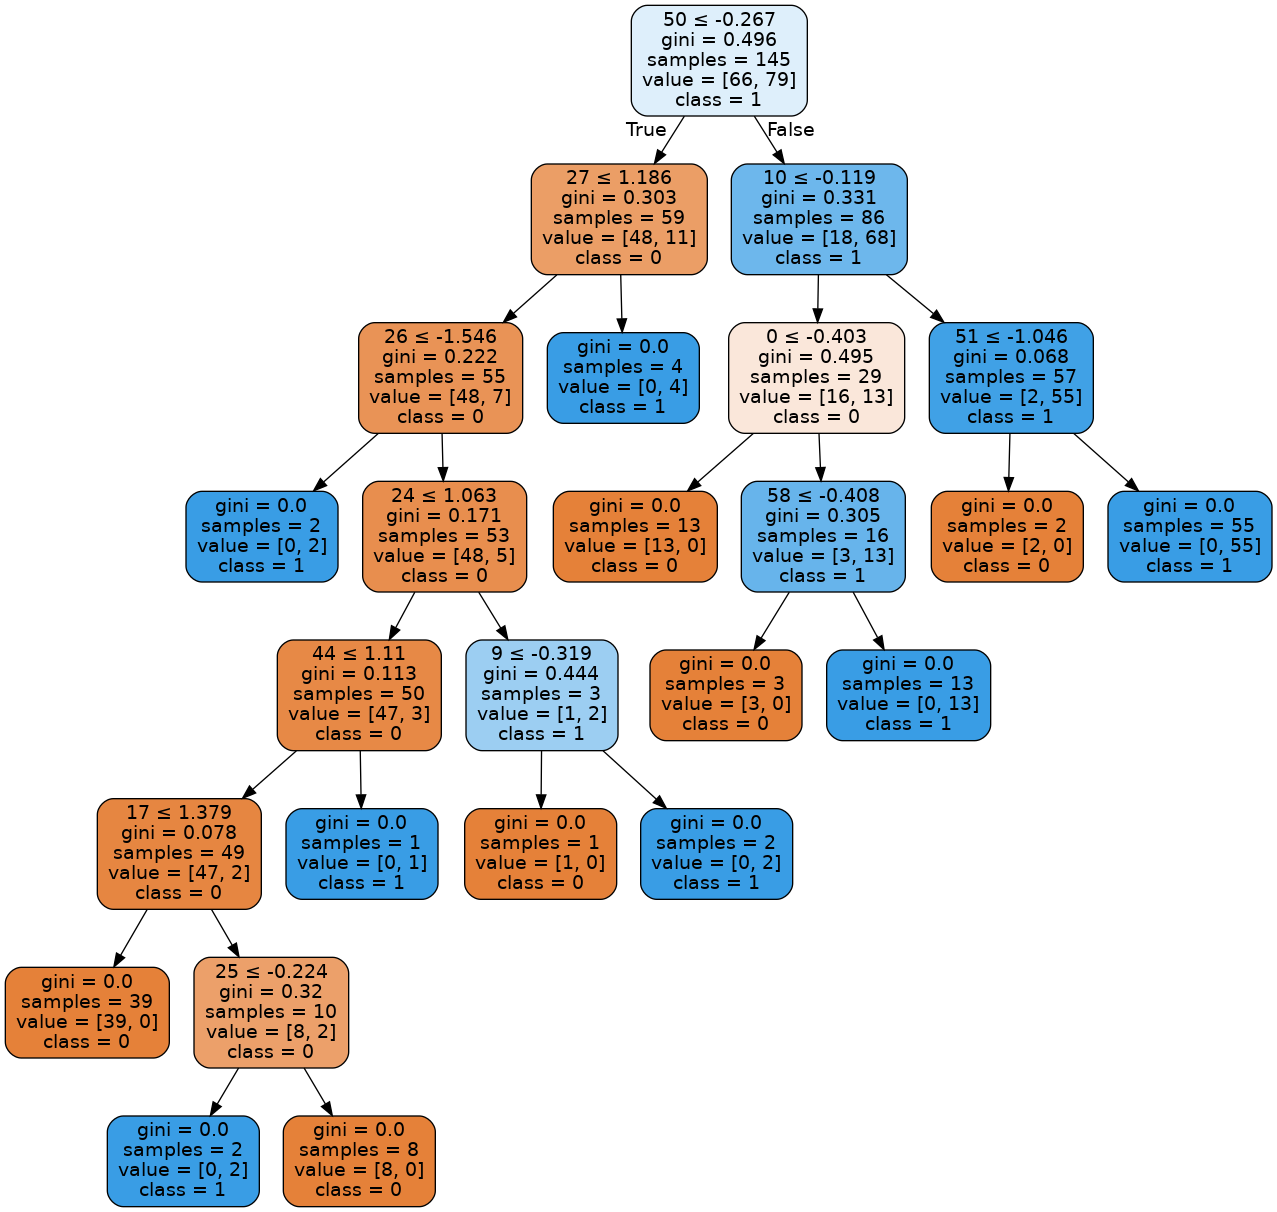

In [6]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns.values.tolist(),class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Simple Decision tree works well and fast with the small dataset.

## XGBoost Model (5 Points)

### Sonar dataset

In [7]:
y.shape

(208,)

In [8]:
x_unscaled.shape

(208, 60)

In [9]:
# data_dmatrix = xgb.DMatrix(data=x_unscaled,label=y)
X_train, X_test, y_train, y_test = train_test_split(x_unscaled, y, test_size=0.3, random_state=13)

In [10]:
t = TicToc() # create TicToc instance
t.tic() # Start timer
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)
t.toc() # Print elapsed time

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)
Elapsed time is 0.057766 seconds.


In [11]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.71%


In [12]:
# k-fold cross validation evaluation of xgboost model
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# CV model
t.tic() # Start timer
kfold = KFold(n_splits=24)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
t.toc() # Print elapsed time

Accuracy: 89.58% (12.56%)
Elapsed time is 0.738844 seconds.


## Higgs perhaps?

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

http://archive.ics.uci.edu/ml/datasets/HIGGS

`11_000_000 records`

In [13]:
t.tic() # Start timer
df = pd.read_csv('data/HIGGS.csv', header=None)
x_unscaled = df #.sample(frac=1, replace=True, random_state=1)
y = x_unscaled[0]
y_hot = to_categorical(y, num_classes = 2)
x_unscaled.drop([0],axis=1, inplace=True)
t.toc() # Print elapsed time

Elapsed time is 152.235950 seconds.


## High-level features vs low-level features

* Low-level features: the kinematic properties measured by the particle detectors in the accelerator. Separate the first 21 features
* High-level features derived by physicists to help discriminate between the two classes

In [14]:
x_low_level_features = x_unscaled.iloc[:,0:21]
x_high_level_features = x_unscaled.iloc[:,21:]

print(x_low_level_features.shape)
print(x_high_level_features.shape)


(11000000, 21)
(11000000, 7)


In [15]:
t.tic() # Start timer
X_train, X_test, y_train, y_test = train_test_split(x_high_level_features, y, test_size=0.3, random_state=13)
t.toc() # Print elapsed time

Elapsed time is 4.467086 seconds.


### Train classifier only on `High-level features` (11_000_000, 7)

In [16]:
from joblib import dump
from joblib import load
t.tic() # Start timer
model = XGBClassifier()
model.fit(X_train, y_train, verbose=True)
# save model to file
file = "high_level_features.joblib.dat"
dump(model, file)
print("Saved model to: " + file)
# some time later...
# load model from file
loaded_model = load(file)
print("Loaded model from:"+ file)
# make predictions for test data
predictions = loaded_model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(model)
t.toc() # Print elapsed time

[21:53:53] WARNING: /workspace/src/gbm/gbtree.cc:138: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
Saved model to: high_level_features.joblib.dat
Loaded model from:high_level_features.joblib.dat
Accuracy: 71.09%
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)
Elapsed time is 1493.924884 seconds.


As pormissed: will use everithing available!
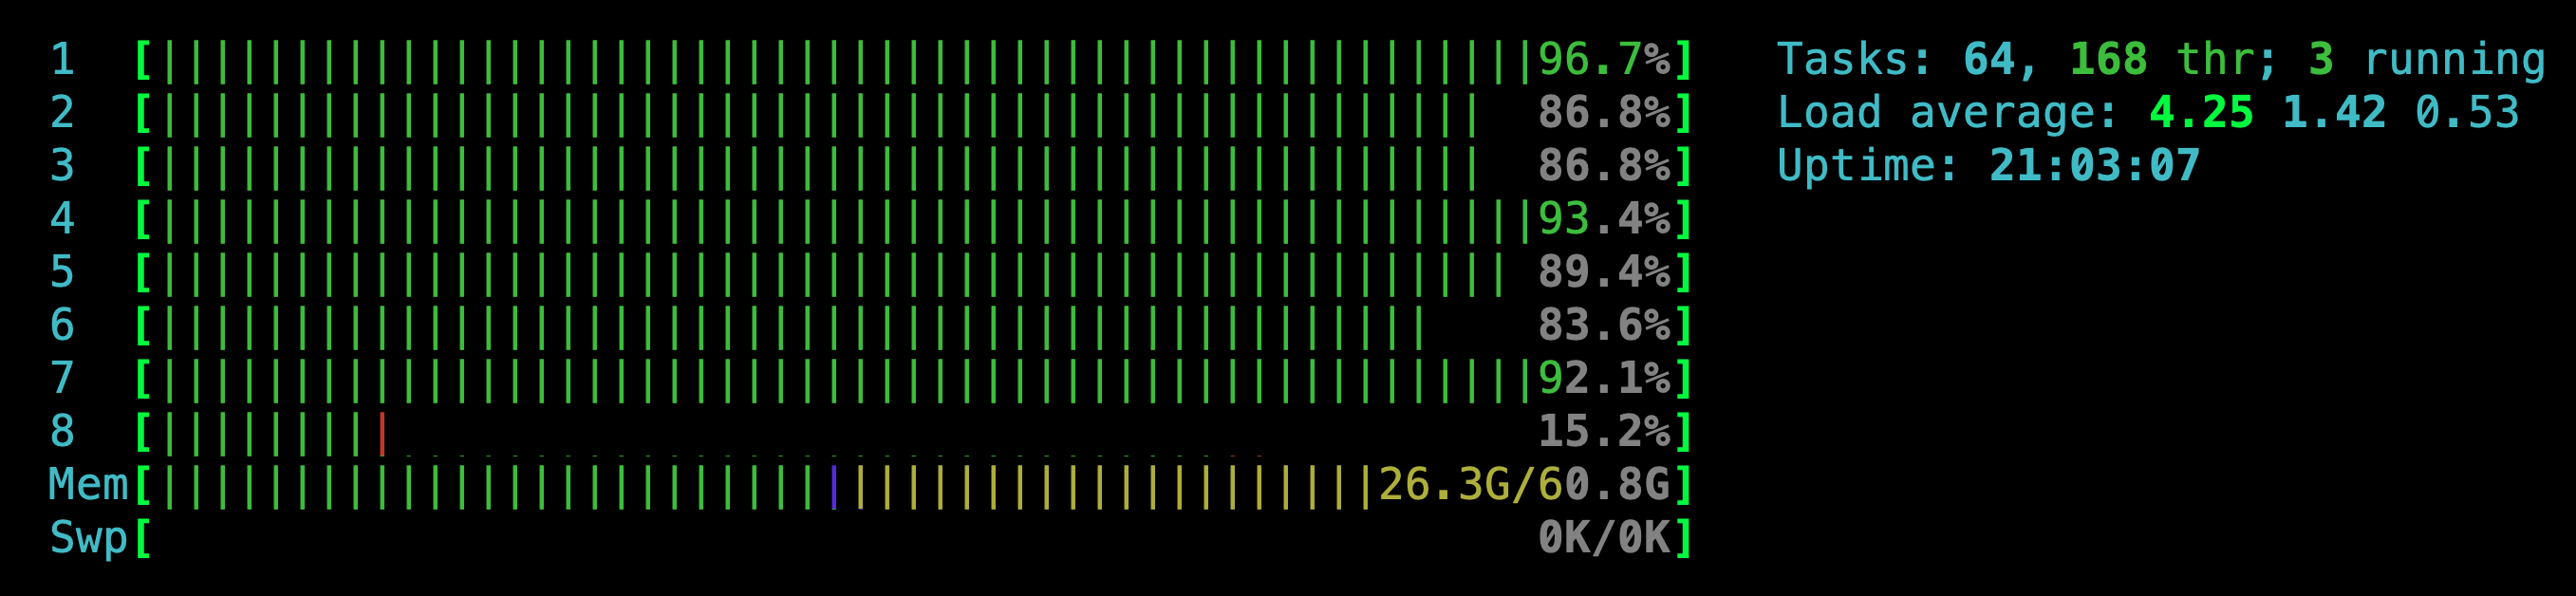

The fit for the `7 x 11 Milion` datapoints takes `~1400 sec or above 23 min` and used `26G of RAM, on 8 cores Xeon X5482 @ 3.20GHz`.
The `GPU` acceleration is supported: CUDA 9.0, Compute Capability 3.5 required. The data/loading and processing can be speed up by using `GPU` accelerated `cuDF` DataFrame and XGBoost binary buffer files for storage.

##  Bagging Model (5 Points): Sonar dataset

In [19]:
df = pd.read_csv('sonar.csv', header=None)
x_unscaled = df.sample(frac=1, replace=True, random_state=1)
y_hot = to_categorical(x_unscaled[60], num_classes = 2)
y = x_unscaled[60]
x_unscaled.drop([60],axis=1, inplace=True)
print(x_unscaled.shape)
print(y.shape)

(208, 60)
(208,)


In [20]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
X = x
Y = y
seed = 7
t.tic() # Start timer
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())
t.toc() # timer

0.9085714285714286
Elapsed time is 4.006836 seconds.


## Random Forest Model  (5 Points):  Sonar dataset

In [21]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
X = x
Y = y
seed = 7
num_trees = 100
max_features = 3
t = TicToc() # create TicToc instance
t.tic() # Start timer
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())
t.toc() #

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9328571428571429
Elapsed time is 1.803825 seconds.


## Random Forest Model  (5 Points):  Higgs test dataset, perhaps NOT?!

In [100]:
print(X_test.shape)
print(y_test.shape)
X = X_test
Y = y_test

(63, 60)
(63,)


In [101]:
seed = 7
num_trees = 100
max_features = 3
t = TicToc() # create TicToc instance
t.tic() # Start timer
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())
t.toc() #

0.7119047619047619
Elapsed time is 1.665120 seconds.


The above code was running in one tread! So much different from XGBoost!

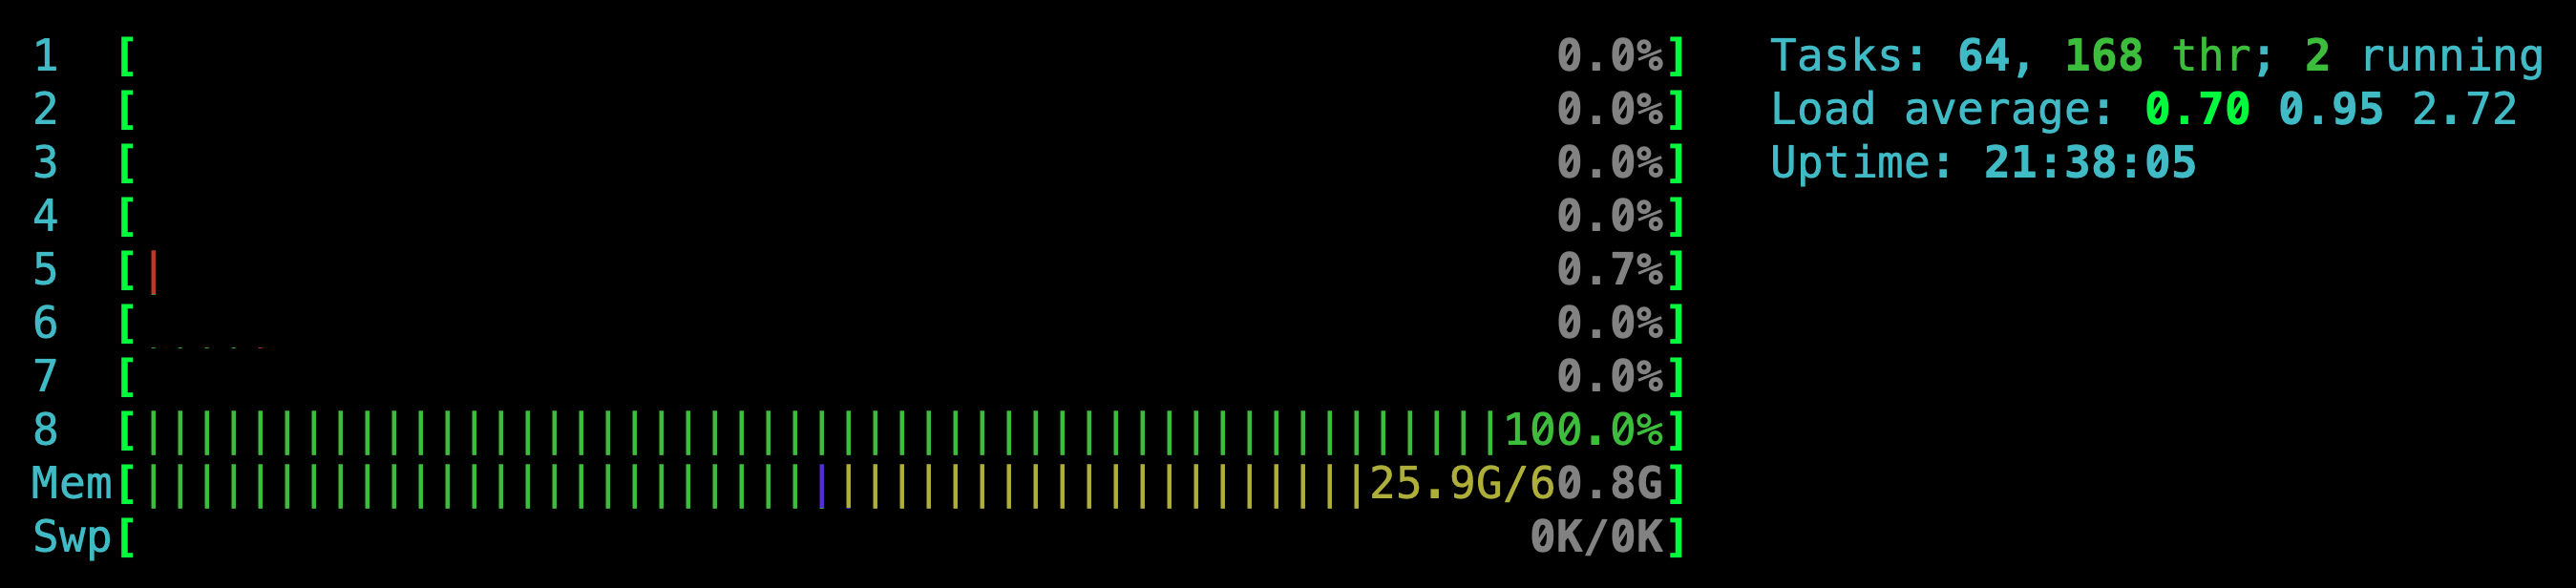

## Feature importance using Random Forest models (5 Points): Sonar Dataset

In [25]:

df = pd.read_csv('sonar.csv', header=None)
x_unscaled = df.sample(frac=1, replace=True, random_state=1)
y_hot = to_categorical(x_unscaled[60], num_classes = 2)
y = x_unscaled[60]
x_unscaled.drop([60],axis=1, inplace=True)

print(x_unscaled.shape)
print(y.shape)
X = X
Y = y
X_train, X_test, y_train, y_test = train_test_split(x_unscaled, y, test_size=0.3, random_state=13)


(208, 60)
(208,)


In [26]:
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
t = TicToc() # create TicToc instance
t.tic() # Start timer
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
t.toc()

Elapsed time is 0.177399 seconds.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [27]:
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

15
Int64Index([0, 1, 3, 8, 9, 10, 11, 12, 16, 36, 44, 47, 48, 50, 51], dtype='int64')


## Feature importance using XGBoost models (5 Points)

### Sonar dataset

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)
Elapsed time is 0.033052 seconds.


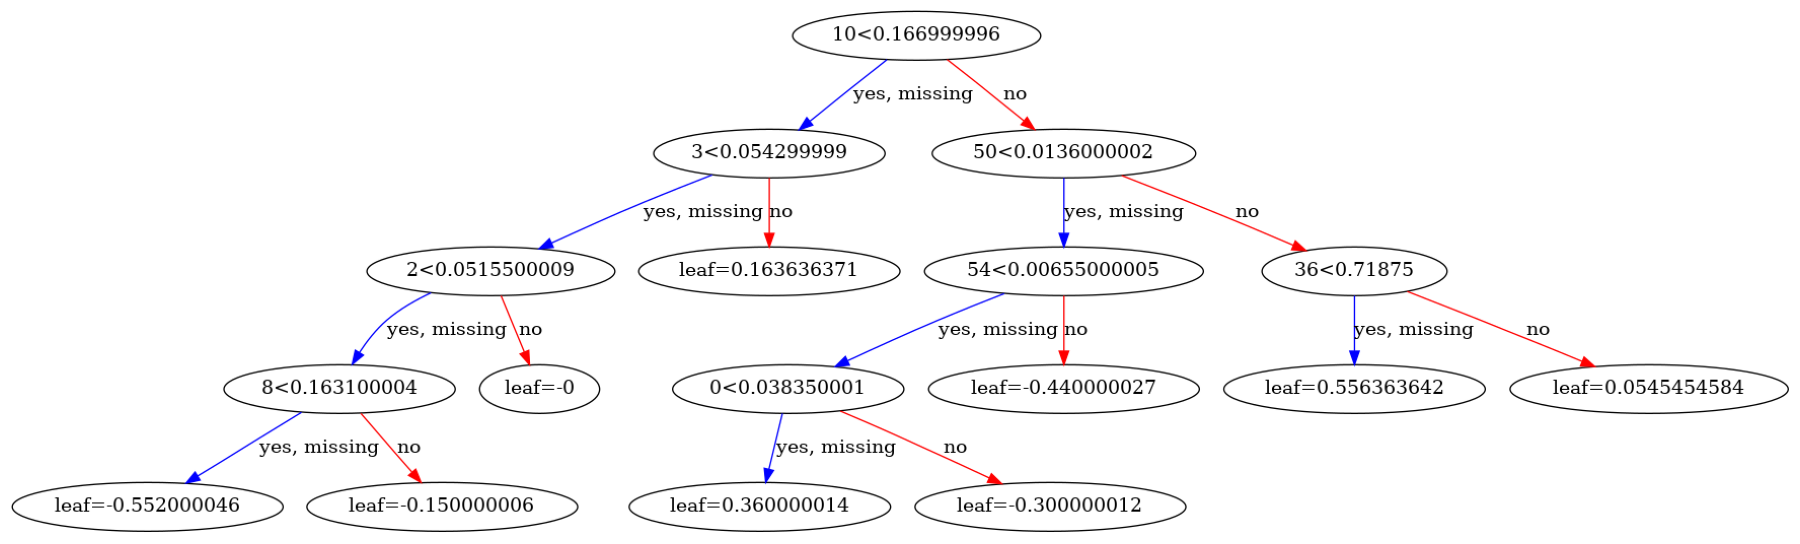

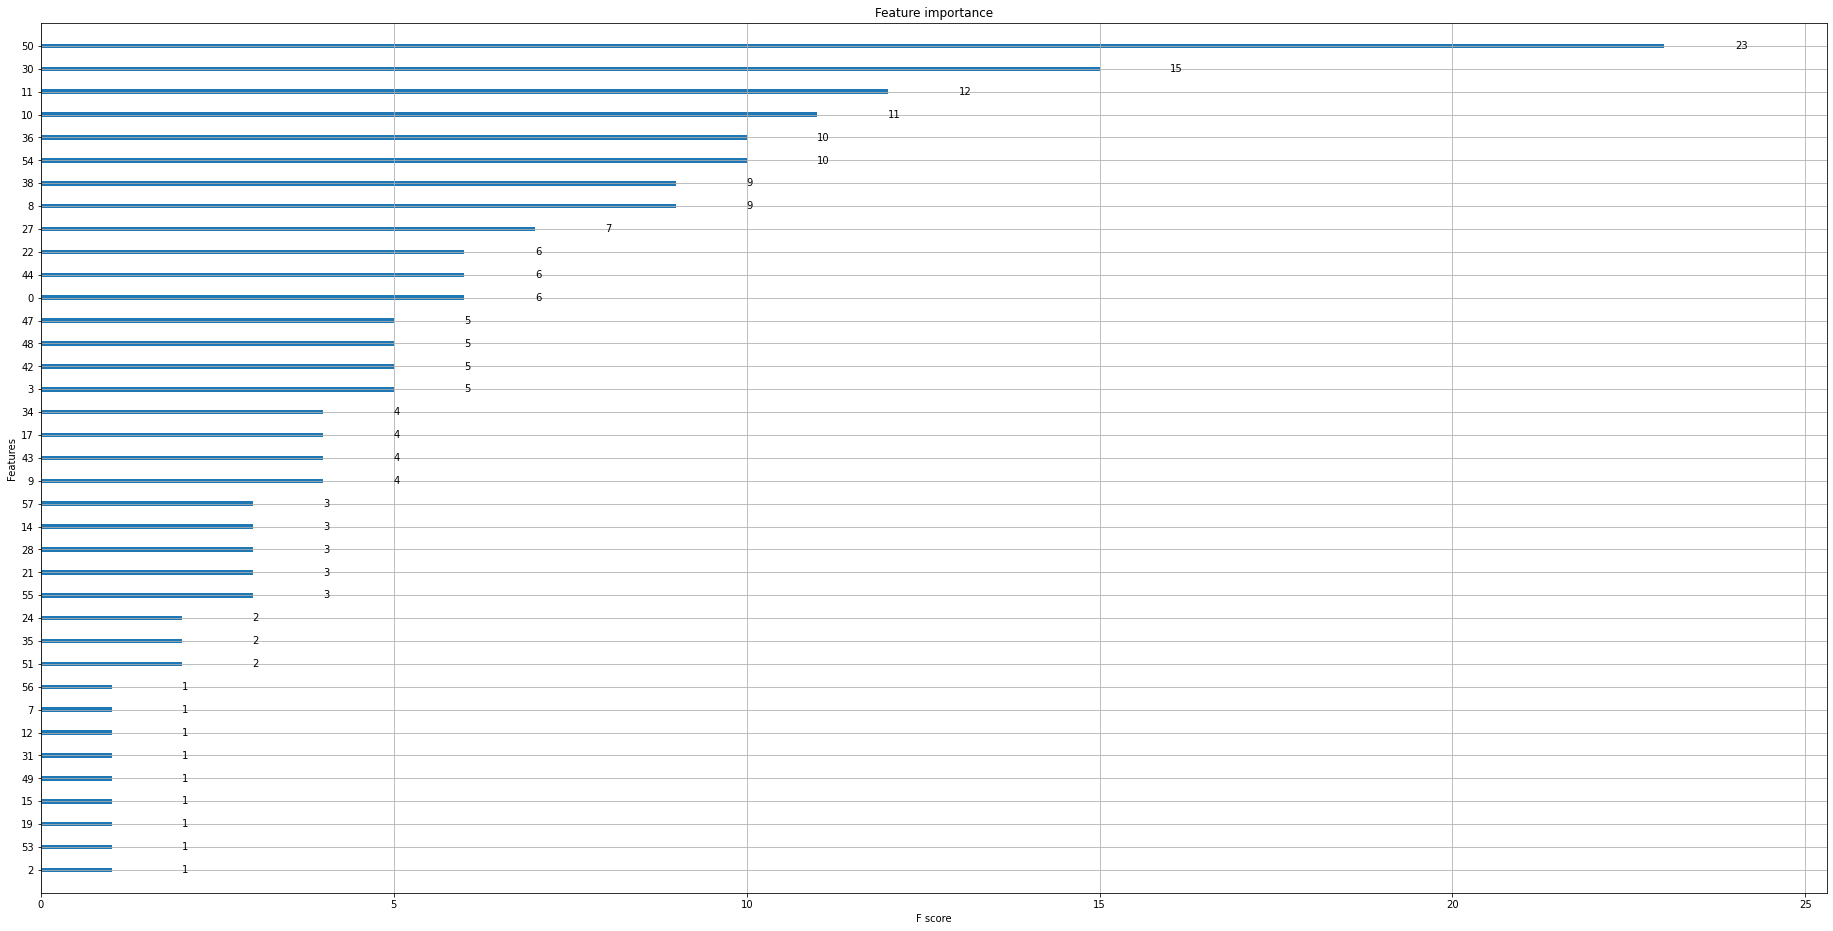

In [29]:
df = pd.read_csv('sonar.csv', header=None)
x_unscaled = df.sample(frac=1, replace=True, random_state=1)
y_hot = to_categorical(x_unscaled[60], num_classes = 2)
y = x_unscaled[60]
x_unscaled.drop([60],axis=1, inplace=True)

from xgboost import plot_tree
from xgboost import plot_importance
from matplotlib import pyplot
%matplotlib inline
from matplotlib.pylab import rcParams
t = TicToc() # create TicToc instance
t.tic() # Start timer
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)
t.toc() # Print elapsed time

##set up the parameters
rcParams['figure.figsize'] = 32,16
plot_tree(model)
pyplot.show()
plot_importance(model)
pyplot.show()


## Feature importance using any Explainable AI Package (e.g., LIME or SHAP) (5 Points)

Model Performance Evaluation

In [41]:
predictions = model.predict(X_test)
predictions[:10]

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0])

In [42]:
y_test[:10]

121    1
96     0
143    1
140    1
77     0
111    1
68     0
151    1
193    1
57     0
Name: 60, dtype: int64

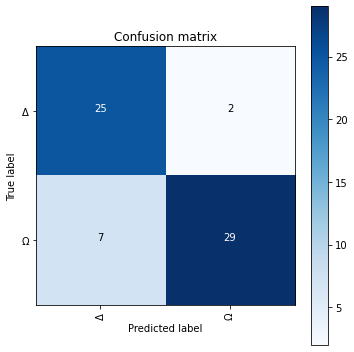

In [47]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

from sklearn.metrics import confusion_matrix
import itertools
confusion_mtx = confusion_matrix(y_test, predictions)
plot_confusion_matrix(confusion_mtx, classes = list({0: 'Δ', 1: 'Ω'}.values()))

## Feature Importances from XGBoost
* Feature Weights: This is based on the number of times a feature appears in a tree across the ensemble of trees
* Gain: This is based on the average gain of splits which use the feature
* Coverage: This is based on the average coverage (number of samples affected) of splits which use the feature

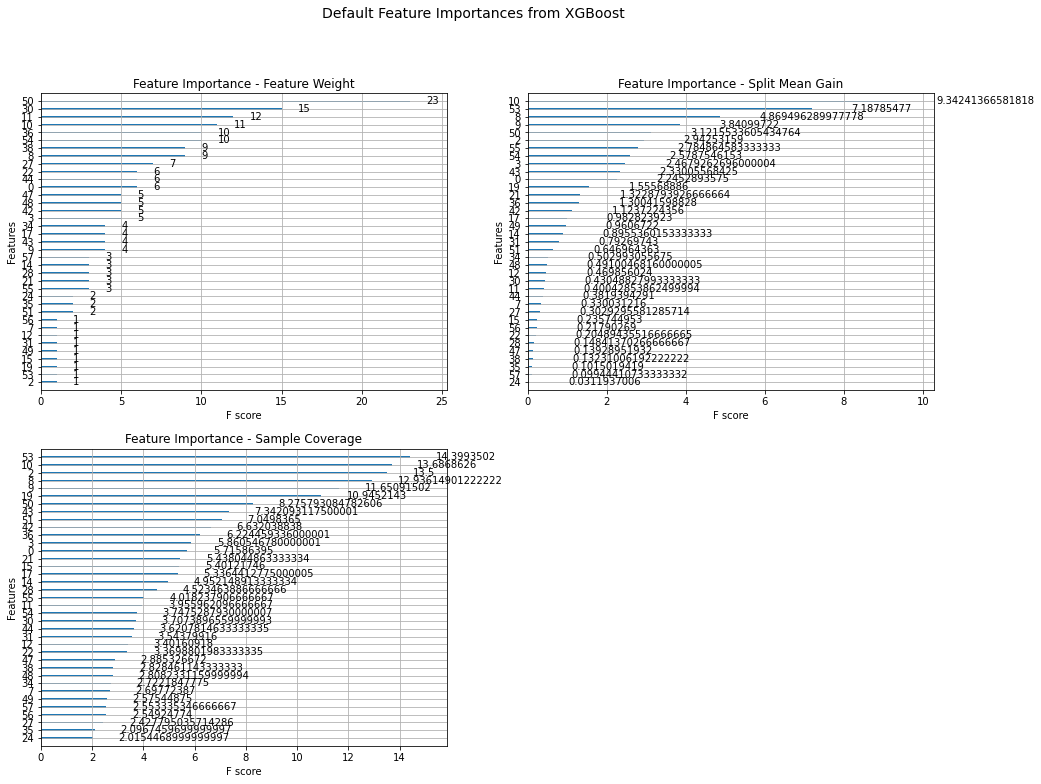

In [51]:
import xgboost
fig = plt.figure(figsize = (16, 12))
title = fig.suptitle("Default Feature Importances from XGBoost", fontsize=14)

ax1 = fig.add_subplot(2,2, 1)
xgboost.plot_importance(model, importance_type='weight', ax=ax1)
t=ax1.set_title("Feature Importance - Feature Weight")

ax2 = fig.add_subplot(2,2, 2)
xgboost.plot_importance(model, importance_type='gain', ax=ax2)
t=ax2.set_title("Feature Importance - Split Mean Gain")

ax3 = fig.add_subplot(2,2, 3)
xgboost.plot_importance(model, importance_type='cover', ax=ax3)
t=ax3.set_title("Feature Importance - Sample Coverage")

In [88]:
xgc_np = xgboost.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=42)
xgc_np.fit(X_train.values, y_train)

import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer

exp = LimeTabularExplainer(X_test.values, feature_names=list(X_test.columns), 
                           discretize_continuous=True, 
                           class_names=['Δ', 'Ω'])
doc_num = 1
print('Actual Label:', y_test[doc_num])
print('Predicted Label:', predictions[doc_num])
exp.explain_instance(X_test.iloc[doc_num].values, xgc_np.predict_proba).show_in_notebook()

Actual Label: 0
Predicted Label: 0


Expected Value: 0.0258614


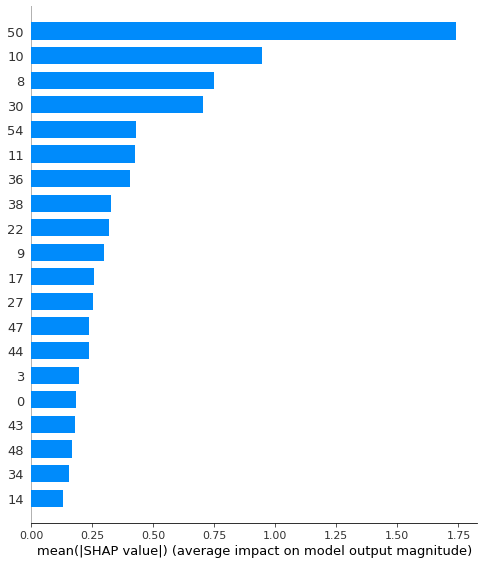

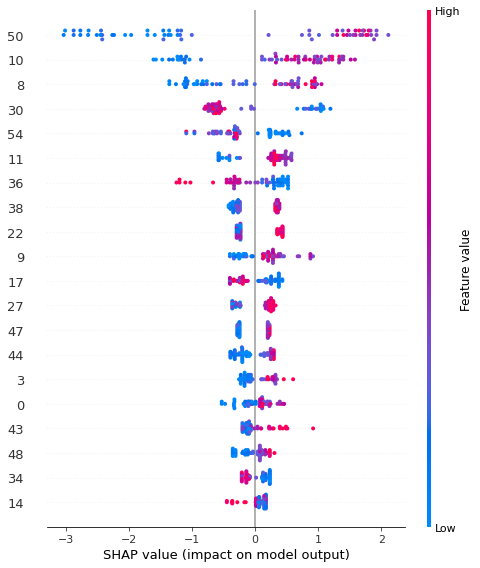

In [98]:
import shap
explainer = shap.TreeExplainer(xgc_np)
shap_values = explainer.shap_values(X_test)
pd.DataFrame(shap_values).head()
print('Expected Value:', explainer.expected_value)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


# Conclusion:

* The Single Decision Tree, Bagging Model and Random Forest Model are easy to explain buth unless the dataset is tiny or the restrictions imposed on computational power like in the case of embeded systems shall not be used otherwise. The Random Forest is the best out of worst.

* The XGBoost  delivers as promise. It scales and gives the choiches of fine tuning and scaling the calculations supporting the distributed calculations with many opensource schedulers.

* Feature importance using: Both Random Forest and XGBoost had selected features previously confirmed being important for this dataset: `[50, 11, 10, ...]`

* Feature importance using any Explainable AI Package LIME or SHAP: again the `[50,10,...]` standing is confirmed by both.

